In [147]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
import sys
sys.path.insert(0, '..')
import argparse

import os
import random

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [149]:
from config import parse_args_ddqn,parse_global_args, get_sweep_params, get_shock_params
from dqn.dqn_runner import evaluate_policy, UpdateCartpoleParams, UpdateAcrobotParams, UpdateMountaincarParams
from dqn.dqn_visualize import evaluate_shock_matrix, LoadModel
from dqn.dqn import DQN_Agent

In [150]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [151]:
parent = argparse.ArgumentParser()
global_parser = parse_global_args(parent)
ddqn_parser = parse_args_ddqn(global_parser)

# Cartpole

In [137]:
updater = UpdateCartpoleParams()
args = updater.update_parser(ddqn_parser)[0]
args.EnvIdex = 0

In [138]:
temp_vanilla_cp_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_rew_cartpole'))
temp_vanilla_cp_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_error_cartpole'))

temp_r2_cp_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'r2_rew_cartpole'))
temp_r2_cp_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'r2_error_cartpole'))

temp_robust_cp_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'robust_rew_cartpole'))
temp_robust_cp_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'robust_error_cartpole'))

In [139]:
sweep_str = '_shock_masspole'
file_end = '.npy'
vanilla_cp_file_rew = temp_vanilla_cp_file_rew + sweep_str + file_end
vanilla_cp_file_error = temp_vanilla_cp_file_error + sweep_str + file_end

r2_cp_file_rew = temp_r2_cp_file_rew + sweep_str + file_end
r2_cp_file_error = temp_r2_cp_file_error + sweep_str + file_end

robust_cp_file_rew = temp_robust_cp_file_rew + sweep_str + file_end
robust_cp_file_error = temp_robust_cp_file_error + sweep_str + file_end

In [140]:
sweep_param_str = ['masspole', 'length']
param_vec1 = get_shock_params(env=args.EnvIdex, sweep_name=sweep_param_str[0])
param_vec2 = get_shock_params(env=args.EnvIdex, sweep_name=sweep_param_str[1])
sweep_param_vecs = [param_vec1, param_vec2]

# Vanilla DDQN cartpole evaluation

In [24]:
model_subfolder = 'vanilla_cartpole_reduleLR_scheduler1_5e5_ema'
model_name = os.listdir(os.path.abspath(os.path.join('dqn', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [25]:
vanilla_cp_rew, vanilla_cp_error = evaluate_shock_matrix(args, sweep_param_str, sweep_param_vecs=sweep_param_vecs, model_inst=model_gen, n_iter=10)

processed models: 5: 100%|███████████████████████| 5/5 [21:23<00:00, 256.64s/it]


In [26]:
np.save(vanilla_cp_file_rew, vanilla_cp_rew)
np.save(vanilla_cp_file_error, vanilla_cp_error)

# R2 DDQN cartpole evaluation

In [27]:
model_subfolder = 'R2_cartpole_reduleLR_scheduler1_5e5_ema'
model_name = os.listdir(os.path.abspath(os.path.join('dqn', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [28]:
r2_cp_rew, r2_cp_error = evaluate_shock_matrix(args, sweep_param_str, sweep_param_vecs=sweep_param_vecs, model_inst=model_gen, n_iter=10)

processed models: 5: 100%|███████████████████████| 5/5 [24:50<00:00, 298.05s/it]


In [29]:
np.save(r2_cp_file_rew, r2_cp_rew)
np.save(r2_cp_file_error, r2_cp_error)

# Robust DDQN cartpole evaluation

In [30]:
model_subfolder = 'ro_cartpole_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('dqn', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [31]:
robust_cp_rew, robust_cp_error = evaluate_shock_matrix(args, sweep_param_str, sweep_param_vecs=sweep_param_vecs, model_inst=model_gen, n_iter=10)

processed models: 5: 100%|███████████████████████| 5/5 [36:33<00:00, 438.70s/it]


In [32]:
np.save(robust_cp_file_rew, robust_cp_rew)
np.save(robust_cp_file_error, robust_cp_error)

# Load data

In [141]:
vanilla_cp_rew = np.load(vanilla_cp_file_rew)
vanilla_cp_error = np.load(vanilla_cp_file_error)

In [142]:
r2_cp_rew = np.load(r2_cp_file_rew)
r2_cp_error = np.load(r2_cp_file_error)

In [143]:
robust_cp_rew = np.load(robust_cp_file_rew)
robust_cp_error = np.load(robust_cp_file_error)

In [144]:
vanilla_cp_matrix_mean = np.mean(vanilla_cp_rew, axis=2)[...,None]
vanilla_cp_matrix_std = np.std(vanilla_cp_rew, axis=2)[...,None]

r2_cp_matrix_mean = np.mean(r2_cp_rew, axis=2)[...,None]
r2_cp_matrix_std = np.std(r2_cp_rew, axis=2)[...,None]

robust_cp_matrix_mean = np.mean(robust_cp_rew, axis=2)[...,None]
robust_cp_matrix_std = np.std(robust_cp_rew, axis=2)[...,None]

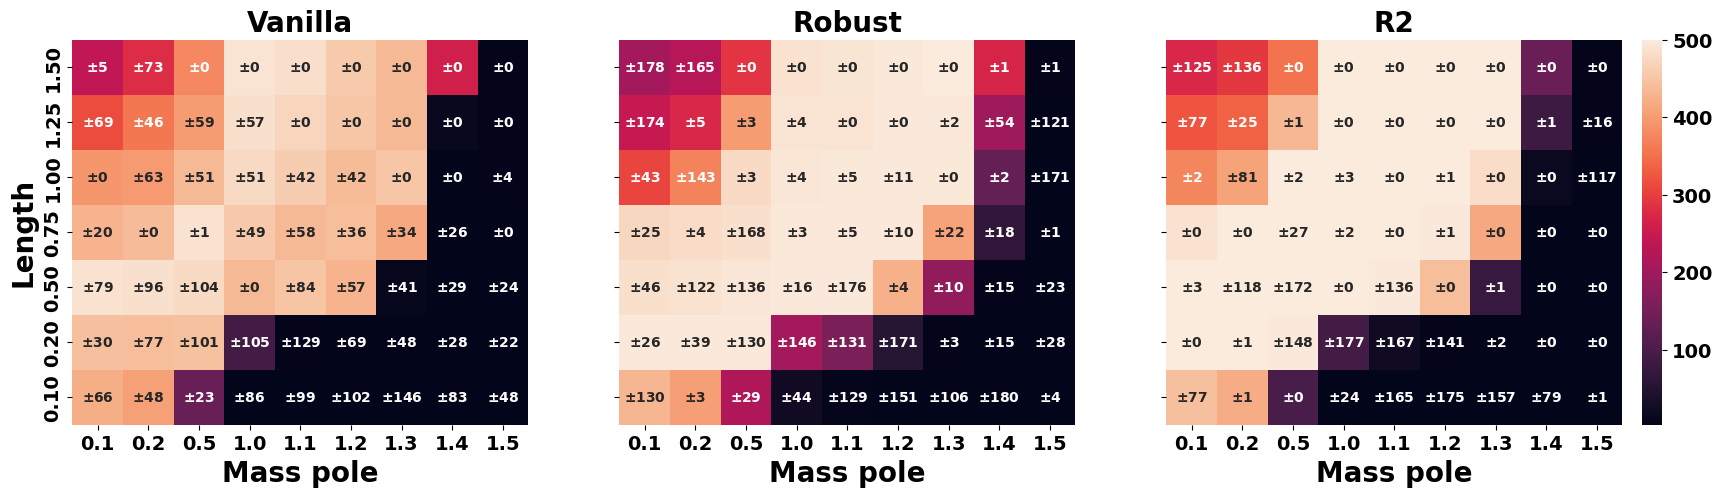

In [146]:
f,axs = plt.subplots(1,3,sharey=True, figsize=(20, 5))
fontsize = 20
titles = [x for x in ['Vanilla', 'Robust', 'R2']]
sweep_param_str = ['Mass pole', 'Length']


all_data = np.concatenate((vanilla_cp_matrix_mean, robust_cp_matrix_mean, r2_cp_matrix_mean), axis=2)
all_std = np.concatenate((vanilla_cp_matrix_std, robust_cp_matrix_std, r2_cp_matrix_std), axis=2)

_min, _max = all_data.min(), all_data.max()

labels = []
for i in range(3):
    axis_labels = (np.asarray(["$\pm${:.0f}".format(value)
                               for value in all_std[..., i].flatten()])).reshape(all_std.shape[:-1])
    labels.append(axis_labels)
    
# cbar_ax = f.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axs):
    if i==2:
        cb_ax = f.add_axes([.91,.11,.01,.77])
        cb_ax.tick_params(axis='both', labelsize=fontsize-6)
    ax = sns.heatmap(all_data[:,:, i].T, annot=True, ax=axs[i], vmin = _min, vmax = _max, cbar= i==2, cbar_ax=cb_ax) #, cbar_ax=None if i!=2 else cbar_ax)
    flat_labels = labels[i].flatten()
    for idx, t in enumerate(ax.texts): t.set_text(flat_labels[idx])
    
    ax.set_xlabel(sweep_param_str[0], fontsize=fontsize)
    if i == 0:
        ax.set_ylabel(sweep_param_str[1], fontsize=fontsize)
        
    ax.set_title(titles[i], fontweight="bold", fontsize=fontsize)
    xlabels = ['{:.1f}'.format(x)  for x in param_vec1]
    ylabels = ['{:.2f}'.format(y)  for y in param_vec2]

    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(ylabels)
    ax.invert_yaxis()
    ax.tick_params(axis='both', labelsize=fontsize-6)
    

# f.tight_layout(rect=[0, 0, .9, 1])
plt.savefig(os.path.abspath('../plots/cartpole_shock_masspole.png'), bbox_inches="tight")

# Acrobot

In [152]:
updater = UpdateAcrobotParams()
args = updater.update_parser(ddqn_parser)[0]
args.EnvIdex = 1

In [153]:
temp_vanilla_ac_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_rew_acrobot'))
temp_vanilla_ac_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_error_acrobot'))

temp_r2_ac_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'r2_rew_acrobot'))
temp_r2_ac_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'r2_error_acrobot'))

temp_robust_ac_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'robust_rew_acrobot'))
temp_robust_ac_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'robust_error_acrobot'))

In [154]:
sweep_str = '_shock'
file_end = '.npy'
vanilla_ac_file_rew = temp_vanilla_ac_file_rew + sweep_str + file_end
vanilla_ac_file_error = temp_vanilla_ac_file_error + sweep_str + file_end

r2_ac_file_rew = temp_r2_ac_file_rew + sweep_str + file_end
r2_ac_file_error = temp_r2_ac_file_error + sweep_str + file_end

robust_ac_file_rew = temp_robust_ac_file_rew + sweep_str + file_end
robust_ac_file_error = temp_robust_ac_file_error + sweep_str + file_end

In [155]:
sweep_param_str = ['link_com_pos_2', 'link_mass_2']
param_vec1 = get_shock_params(env=args.EnvIdex, sweep_name=sweep_param_str[0])
param_vec2 = get_shock_params(env=args.EnvIdex, sweep_name=sweep_param_str[1])
sweep_param_vecs = [param_vec1, param_vec2]

# Vanilla DDQN acrobot evaluation

In [16]:
model_subfolder = 'vanilla_acrobot_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalCartPole-v1
  logger.warn("Overriding environment {}".format(id))
/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalCartPoleStochasticReward-v1
  logger.warn("Overriding environment {}".format(id))
/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalAcrobot-v0
  logger.warn("Overriding environment {}".format(id))
/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalMountainCar-v0
  logger.warn("Overriding environment {}".format(id))


In [11]:
vanilla_ac_rew, vanilla_ac_error = evaluate_shock_matrix(args, sweep_param_str, sweep_param_vecs=sweep_param_vecs, model_inst=model_gen, n_iter=10)

In [12]:
np.save(vanilla_ac_file_rew, vanilla_ac_rew)
np.save(vanilla_ac_file_error, vanilla_ac_error)

# R2 DDQN acrobot evaluation

In [13]:
model_subfolder = 'r2_acrobot_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [14]:
r2_ac_rew, r2_ac_error = evaluate_shock_matrix(args, sweep_param_str, sweep_param_vecs=sweep_param_vecs, model_inst=model_gen, n_iter=10)

In [15]:
np.save(r2_ac_file_rew, r2_ac_rew)
np.save(r2_ac_file_error, r2_ac_error)

# Robust DDQN acrobot evaluation

In [16]:
model_subfolder = 'ro_acrobot_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [17]:
robust_ac_rew, robust_ac_error = evaluate_shock_matrix(args, sweep_param_str, sweep_param_vecs=sweep_param_vecs, model_inst=model_gen, n_iter=10)

In [18]:
np.save(robust_ac_file_rew, robust_ac_rew)
np.save(robust_ac_file_error, robust_ac_error)

# Load data

In [156]:
vanilla_ac_rew = np.load(vanilla_ac_file_rew)
vanilla_ac_error = np.load(vanilla_ac_file_error)

In [157]:
r2_ac_rew = np.load(r2_ac_file_rew)
r2_ac_error = np.load(r2_ac_file_error)

In [158]:
robust_ac_rew = np.load(robust_ac_file_rew)
robust_ac_error = np.load(robust_ac_file_error)

In [159]:
vanilla_ac_matrix_mean = np.mean(vanilla_ac_rew, axis=2)[...,None]
vanilla_ac_matrix_std = np.std(vanilla_ac_rew, axis=2)[...,None]

r2_ac_matrix_mean = np.mean(r2_ac_rew, axis=2)[...,None]
r2_ac_matrix_std = np.std(r2_ac_rew, axis=2)[...,None]

robust_ac_matrix_mean = np.mean(robust_ac_rew, axis=2)[...,None]
robust_ac_matrix_std = np.std(robust_ac_rew, axis=2)[...,None]

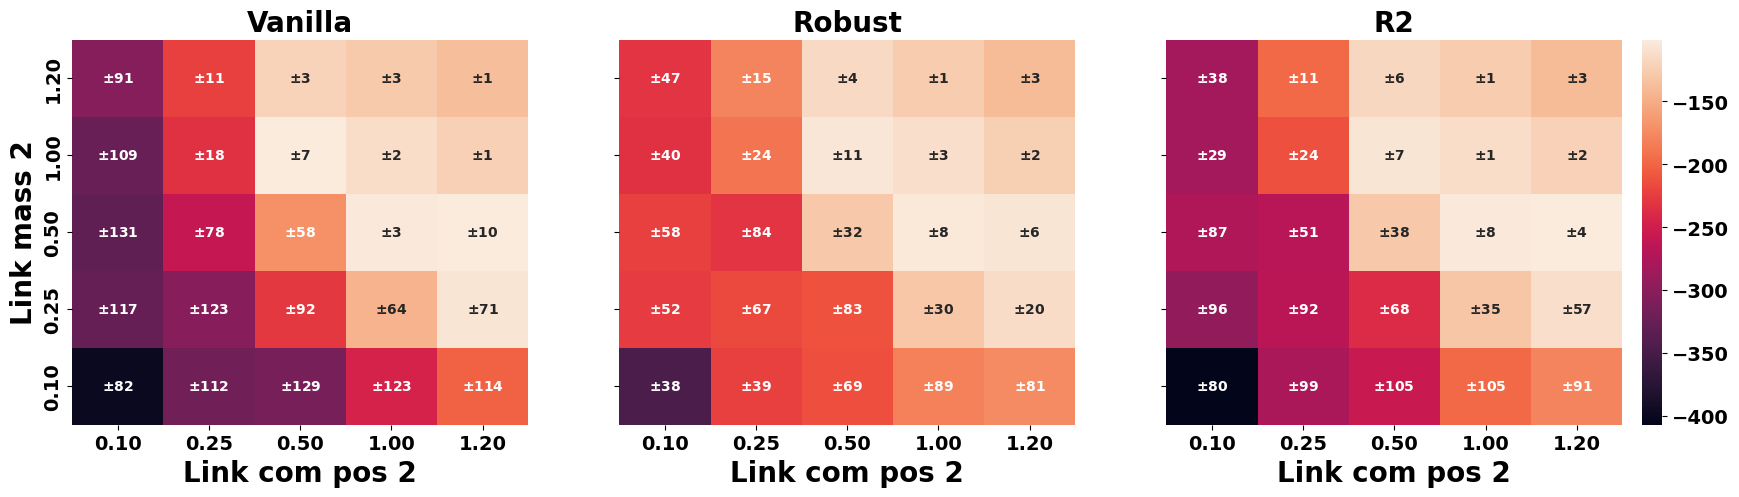

In [160]:
f,axs = plt.subplots(1,3,sharey=True, figsize=(20, 5))
fontsize = 20
titles = [x for x in ['Vanilla', 'Robust', 'R2']]
sweep_param_str = ['Link com pos 2', 'Link mass 2']


all_data = np.concatenate((vanilla_ac_matrix_mean, robust_ac_matrix_mean, r2_ac_matrix_mean), axis=2)
all_std = np.concatenate((vanilla_ac_matrix_std, robust_ac_matrix_std, r2_ac_matrix_std), axis=2)

_min, _max = all_data.min(), all_data.max()

labels = []
for i in range(3):
    axis_labels = (np.asarray(["$\pm${:.0f}".format(value)
                               for value in all_std[..., i].flatten()])).reshape(all_std.shape[:-1])
    labels.append(axis_labels)
    
# cbar_ax = f.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axs):
    if i==2:
        cb_ax = f.add_axes([.91,.11,.01,.77])
        cb_ax.tick_params(axis='both', labelsize=fontsize-6)
    ax = sns.heatmap(all_data[:,:, i].T, annot=True, ax=axs[i], vmin = _min, vmax = _max, cbar= i==2, cbar_ax=cb_ax) #, cbar_ax=None if i!=2 else cbar_ax)
    flat_labels = labels[i].flatten()
    for idx, t in enumerate(ax.texts): t.set_text(flat_labels[idx])
    
    ax.set_xlabel(sweep_param_str[0], fontsize=fontsize)
    if i == 0:
        ax.set_ylabel(sweep_param_str[1], fontsize=fontsize)
        
    ax.set_title(titles[i], fontweight="bold", fontsize=fontsize)
    xlabels = ['{:.2f}'.format(x)  for x in param_vec1]
    ylabels = ['{:.2f}'.format(y)  for y in param_vec2]

    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(ylabels)
    ax.invert_yaxis()
    ax.tick_params(axis='both', labelsize=fontsize-6)

# f.tight_layout(rect=[0, 0, .9, 1])
plt.savefig(os.path.abspath('../plots/acrobot_shock.png'), bbox_inches="tight")

# MountainCar

In [92]:
updater = UpdateMountaincarParams()
args = updater.update_parser(ddqn_parser)[0]
args.EnvIdex = 2

In [93]:
temp_vanilla_mc_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_rew_mountaincar'))
temp_vanilla_mc_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_error_mountaincar'))

temp_r2_mc_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'r2_rew_mountaincar'))
temp_r2_mc_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'r2_error_mountaincar'))

temp_robust_mc_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'robust_rew_mountaincar'))
temp_robust_mc_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'robust_error_mountaincar'))

In [94]:
sweep_str = '_shock'
sweep_vector = get_sweep_params(2, sweep_str)
sweep_param = [sweep_vector, sweep_str]

In [95]:
file_end = '.npy'
vanilla_mc_file_rew = temp_vanilla_mc_file_rew + sweep_str + file_end
vanilla_mc_file_error = temp_vanilla_mc_file_error + sweep_str + file_end

r2_mc_file_rew = temp_r2_mc_file_rew + sweep_str + file_end
r2_mc_file_error = temp_r2_mc_file_error + sweep_str + file_end

robust_mc_file_rew = temp_robust_mc_file_rew + sweep_str + file_end
robust_mc_file_error = temp_robust_mc_file_error + sweep_str + file_end

In [96]:
sweep_param_str = ['gravity', 'force']
param_vec1 = get_shock_params(env=args.EnvIdex, sweep_name=sweep_param_str[0])
param_vec2 = get_shock_params(env=args.EnvIdex, sweep_name=sweep_param_str[1])
sweep_param_vecs = [param_vec1, param_vec2]

# Vanilla DDQN mountaincar evaluation

In [28]:
model_subfolder = 'vanilla_mountaincar_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [29]:
vanilla_mc_rew, vanilla_mc_error = evaluate_shock_matrix(args, sweep_param_str, sweep_param_vecs=sweep_param_vecs, model_inst=model_gen, n_iter=10)

In [30]:
np.save(vanilla_mc_file_rew, vanilla_mc_rew)
np.save(vanilla_mc_file_error, vanilla_mc_error)

# R2 DDQN mountaincar evaluation

In [31]:
model_subfolder = 'r2_mountaincar_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [32]:
r2_mc_rew, r2_mc_error = evaluate_shock_matrix(args, sweep_param_str, sweep_param_vecs=sweep_param_vecs, model_inst=model_gen, n_iter=10)

In [33]:
np.save(r2_mc_file_rew, r2_mc_rew)
np.save(r2_mc_file_error, r2_mc_error)

# Robust DDQN mountaincar evaluation

In [34]:
model_subfolder = 'ro_mountaincar_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [35]:
robust_mc_rew, robust_mc_error = evaluate_shock_matrix(args, sweep_param_str, sweep_param_vecs=sweep_param_vecs, model_inst=model_gen, n_iter=10)

In [36]:
np.save(robust_mc_file_rew, robust_mc_rew)
np.save(robust_mc_file_error, robust_mc_error)

# Load data

In [97]:
vanilla_mc_rew = np.load(vanilla_mc_file_rew)
vanilla_mc_error = np.load(vanilla_mc_file_error)

In [98]:
r2_mc_rew = np.load(r2_mc_file_rew)
r2_mc_error = np.load(r2_mc_file_error)

In [99]:
robust_mc_rew = np.load(robust_mc_file_rew)
robust_mc_error = np.load(robust_mc_file_error)

In [100]:
vanilla_mc_matrix_mean = np.mean(vanilla_mc_rew, axis=2)[...,None]
vanilla_mc_matrix_std = np.std(vanilla_mc_rew, axis=2)[...,None]

r2_mc_matrix_mean = np.mean(r2_mc_rew, axis=2)[...,None]
r2_mc_matrix_std = np.std(r2_mc_rew, axis=2)[...,None]

robust_mc_matrix_mean = np.mean(robust_mc_rew, axis=2)[...,None]
robust_mc_matrix_std = np.std(robust_mc_rew, axis=2)[...,None]

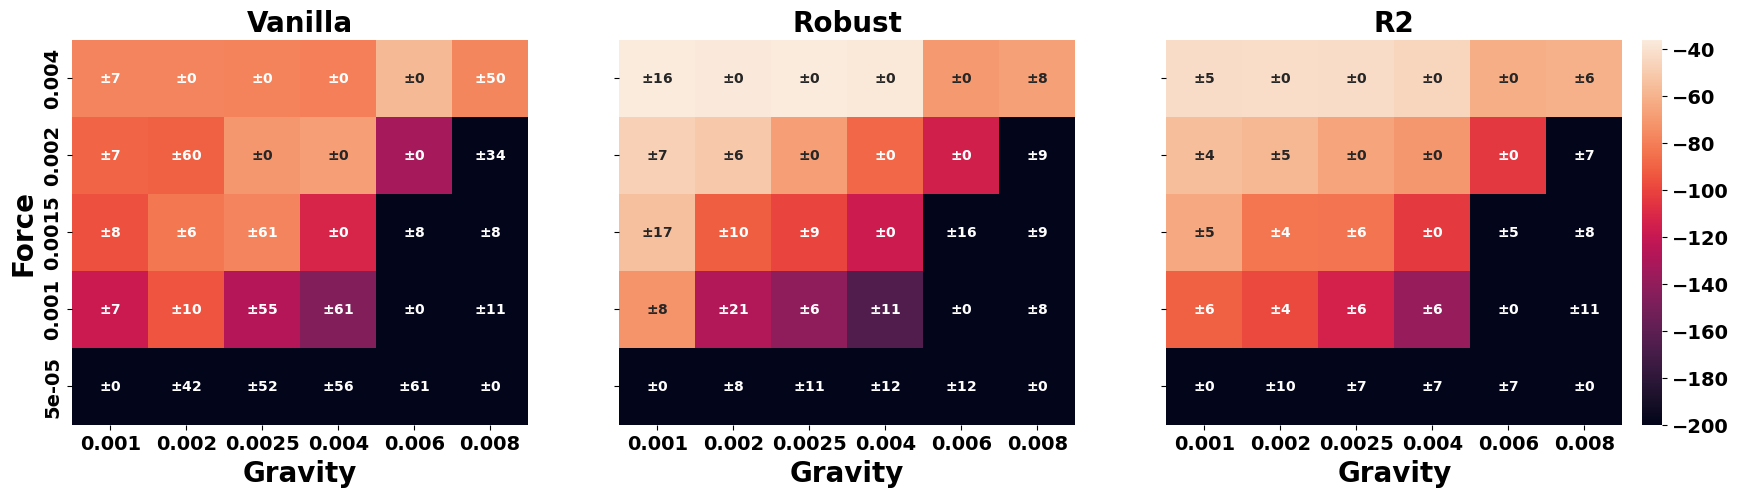

In [131]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
fontsize = 20

f,axs = plt.subplots(1,3,sharey=True, figsize=(20, 5))
titles = [x for x in ['Vanilla', 'Robust', 'R2']]
sweep_param_str = ['Gravity', 'Force']


all_data = np.concatenate((vanilla_mc_matrix_mean, robust_mc_matrix_mean, r2_mc_matrix_mean), axis=2)
all_std = np.concatenate((vanilla_mc_matrix_std, robust_mc_matrix_std, r2_mc_matrix_std), axis=2)

_min, _max = all_data.min(), all_data.max()

labels = []
for i in range(3):
    axis_labels = (np.asarray(["$\pm${:.0f}".format(value)
                               for value in all_std[..., i].flatten()])).reshape(all_std.shape[:-1])
    labels.append(axis_labels)
    
# cbar_ax = f.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axs):
    
    if i==2:
        cb_ax = f.add_axes([.91,.11,.01,.77])
        cb_ax.tick_params(axis='both', labelsize=fontsize-6)
    ax = sns.heatmap(all_data[:,:, i].T, annot=True, ax=axs[i], vmin = _min, vmax = _max, cbar= i==2, cbar_ax=cb_ax)
    flat_labels = labels[i].flatten()
    for idx, t in enumerate(ax.texts): t.set_text(flat_labels[idx])
    
    ax.set_xlabel(sweep_param_str[0], fontsize=fontsize)
    if i == 0:
        ax.set_ylabel(sweep_param_str[1], fontsize=fontsize)
        
    ax.set_title(titles[i], fontweight="bold", fontsize=fontsize)
    # xlabels = ['{:.0e}'.format(x)  for x in param_vec1]
    # ylabels = ['{:.1e}'.format(y)  for y in param_vec2]

    ax.set_xticklabels(param_vec1)
    ax.set_yticklabels(param_vec2)
    
    ax.invert_yaxis()
    ax.tick_params(axis='both', labelsize=fontsize-6)

# f.tight_layout(rect=[0, 0, .9, 1])
plt.savefig(os.path.abspath('../plots/mountaincar_shock.png'), bbox_inches="tight")